<h1>SI 305 Discussion 10: Statistical Analysis</h1>

This week we'll be covering statistical analysis in Python. There are lots of packages you can use to analyze relationships in your data. In this discussion we'll focus on <a href = "https://www.statsmodels.org/stable/index.html">statsmodel.</a> Another useful package that we won't cover today is <a href = "https://scikit-learn.org/stable/">sklearn.</a> 

We'll be using the waste water scan data. This data measures the amount of COVID-19, influenza and other viruses in wastewater. For more details see the <a href = "https://docs.google.com/document/d/1vmTYziZxRMxANLVG0ly1c4-3scamvvXEkpsISZ_dF3E/edit">data dictionary.</a> 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1kQ6oEeNNntgQ0V2rv21_osuMO9Xr_ni6but7tVtrYjw/gviz/tq?tqx=out:csv")

In [3]:
df['collection_date'] = pd.to_datetime(df['collection_date'])
df['collection_month'] = df['collection_date'].dt.month

In [4]:
def assign_month(s):
    if s < 3 or s == 12:
        return 'winter'
    elif s <= 5:
        return 'spring'
    elif s <= 8:
        return 'summer'
    else:
        return 'fall'

df['season'] = df['collection_month'].apply(assign_month)

<h2>Live Coding Example: Do we detect higher levels of COVID-19 in certain seasons?</h2>

We went ahead and created a new variable called `season` for you. For the sake of this excersize, we'll assume 

* Winter = December, January, February
* Spring = March, April, May
* Summer = June, July, August
* Fall = September, October, November

<h3>1.A: Create a plot that shows the relationship between COVID-19 and season</h3>
Before we go through the effort of doing a full statistical analysis, it can be helpful to plot our data to see if there's any relationship. Let's create a plot that shows the relationship between COVID-19 and season.

There are a few different ways COVID-19 levels are measured in this dataset. We'll use the variable `N_Gene_gc_g_dry_weight`

<BarContainer object of 4 artists>

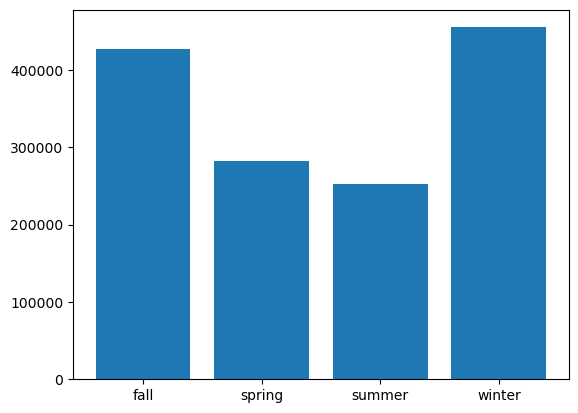

In [5]:
avg_height = df.groupby('season')['N_Gene_gc_g_dry_weight'].mean()
avg_height = avg_height.reset_index()

plt.bar(height = avg_height['N_Gene_gc_g_dry_weight'], x = avg_height['season'])

<h3>1.B Analysis of Variance</h3>

We are interested in how each individual season impacts COVID-19 levels. This means a type 2 anova is most appropriate. For a refresher on what type of ANOVA to use, see <a href = "https://md.psych.bio.uni-goettingen.de/mv/unit/lm_cat/lm_cat_unbal_ss_explained.html">this page</a>

In [38]:
season_ols = ols('N_Gene_gc_g_dry_weight ~ C(season)', data = df).fit()

In [39]:
sm.stats.anova_lm(season_ols, typ=2)

,sum_sq,df,F,PR(>F)
C(season),1.569946e+12,3.0,4.098888,0.007534
Residual,2.502382e+13,196.0,NaN,NaN


<h3>1.C Interpretation</h3>

One of the most important parts of doing statistical analysis is interpretting your results *in the context of the problem.* Let's write 1-2 sentences explaining what these results mean.

**Bad:** 

There is a relationship between season and COVID-19 levels 

**Better:**

There is a statistically significant relationship between season and COVID-19 levels in wastewater

**Even better:**

There is a statistically significant difference between the mean amount of COVID-19 detected in wastewater in each season

<h2>Question 1: What is the relationship between COVID-19 levels and influenza levels?</h2>

Use the column `Influenza_A_gc_g_dry_weight` to measure influenza levels

<h3>1.A: Create a plot that shows the relationship between COVID-19 and influenza</h3>

Text(0, 0.5, 'COVID-19 Level')

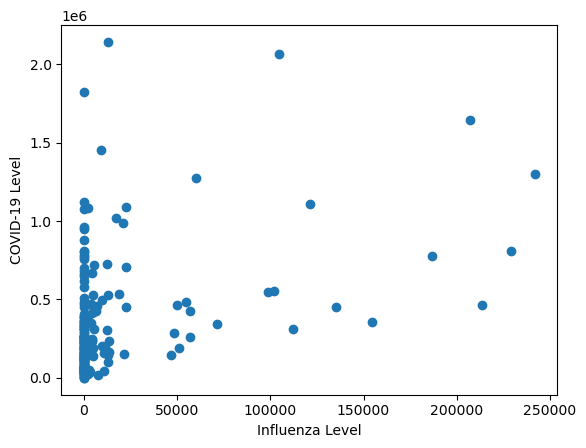

In [8]:
plt.scatter(df['Influenza_A_gc_g_dry_weight'], df['N_Gene_gc_g_dry_weight'])
plt.xlabel("Influenza Level")
plt.ylabel("COVID-19 Level")

<h3>1.B: Calculate the correlation between these two variables</h3>

In [9]:
df[['Influenza_A_gc_g_dry_weight', 'N_Gene_gc_g_dry_weight']].corr()

,Influenza_A_gc_g_dry_weight,N_Gene_gc_g_dry_weight
Influenza_A_gc_g_dry_weight,1.000000,0.389812
N_Gene_gc_g_dry_weight,0.389812,1.000000


<h3>1.C: Interpret in context</h3>

There is a positive, linear relationship between influenza levels and COVID-19 levels in wastewater. The correlation coefficent is 0.3898. When COVID-19 levels increase, we would also expect to see influenza levels increase too and vice versa. 

<h3>1.D: Linear Regression</h3>

Let's predict influenza levels based on COVID-19 levels and the season

In [32]:
model = ols('Influenza_A_gc_g_dry_weight ~ N_Gene_gc_g_dry_weight + C(season)', data = df)
result = model.fit()

In [33]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Influenza_A_gc_g_dry_weight   R-squared:                       0.384
Model:                                     OLS   Adj. R-squared:                  0.372
Method:                          Least Squares   F-statistic:                     30.43
Date:                         Sun, 29 Oct 2023   Prob (F-statistic):           1.12e-19
Time:                                 22:17:34   Log-Likelihood:                -2357.1
No. Observations:                          200   AIC:                             4724.
Df Residuals:                              195   BIC:                             4741.
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5778.0839   5010.213     -1.153      0.250   -1.57e+04    4103.079
C(season)[T.spring]    -3330.0325   6870.529     -0.485      0.628   -1.69e+04    1.02e+04
C(season)[T.summer]    -2511.3224   5855.376     -0.429      0.668   -1.41e+04    9036.675
C(season)[T.winter]     4.849e+04   6697.611      7.240      0.000    3.53e+04    6.17e+04
N_Gene_gc_g_dry_weight     0.0350      0.006      5.435      0.000       0.022       0.048
==============================================================================
Omnibus:                      121.153   Durbin-Watson:                   0.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              871.220
Skew:                           2.267   Prob(JB):                    6.56e-190
Kurtosis:                      12.165   Cond. No.                     2.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
result.tvalues

Intercept                -1.153261
season[T.spring]         -0.484684
season[T.summer]         -0.428892
season[T.winter]          7.239810
N_Gene_gc_g_dry_weight    5.435119
dtype: float64

In [13]:
result.params

Intercept                 -5778.083864
season[T.spring]          -3330.032536
season[T.summer]          -2511.322366
season[T.winter]          48489.427669
N_Gene_gc_g_dry_weight        0.034972
dtype: float64

<h3>1.E: Interpret in context</h3>

There are lots of interesting results from our linear regression! You don't have to interpret everything, but here are some things to pay attention to when reading your regression results:

* <a href = "https://people.duke.edu/~rnau/rsquared.htm">R-squared</a>
* <a href = "https://stats.oarc.ucla.edu/spss/library/spss-libraryunderstanding-and-interpreting-parameter-estimates-in-regression-and-anova/">Parameter estimates and their p-value</a>
* <a href = "https://stats.oarc.ucla.edu/stata/output/regression-analysis/">F statistic</a>

38.4% of the variation in influenza levels is explained by its linear relationship with COVID-19 levels and the season.

Of the four predictor we use (COVID-19 levels, spring, summer, winter), only COVID-19 levels and winter are statistically significant.

<h2>Bonus Question</h2>
This is a bonus question for you to attempt individually. This can only help your grade, so try your best! Make sure to submit your completed notebook to Vocareum. 


Create a linear regression model that predicts `Noro_G2_gc_g_dry_weight` based on `Influenza_A_gc_g_dry_weight`, the year the sample was collected and the `dilution` field. Save your fitted model to the variable `bonus_model`

In [34]:
df['year'] = df.collection_date.dt.year

reg = ols('Noro_G2_gc_g_dry_weight ~ Influenza_A_gc_g_dry_weight + C(year) + dilution', data = df)
bonus_model = reg.fit()

In [35]:
bonus_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Noro_G2_gc_g_dry_weight   R-squared:                       0.045
Model:                                 OLS   Adj. R-squared:                  0.030
Method:                      Least Squares   F-statistic:                     2.937
Date:                     Sun, 29 Oct 2023   Prob (F-statistic):             0.0567
Time:                             22:17:43   Log-Likelihood:                -2325.6
No. Observations:                      128   AIC:                             4657.
Df Residuals:                          125   BIC:                             4666.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -3.432e+06   7.21e+06     -0.476      0.635   -1.77e+07    1.08e+07
C(year)[T.2023]              2.034e+07   1.42e+07      1.428      0.156   -7.84e+06    4.85e+07
Influenza_A_gc_g_dry_weight   171.4937     77.868      2.202      0.029      17.384     325.604
dilution                    -3.432e+06   7.21e+06     -0.476      0.635   -1.77e+07    1.08e+07
==============================================================================
Omnibus:                      124.295   Durbin-Watson:                   0.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1851.235
Skew:                           3.387   Prob(JB):                         0.00
Kurtosis:                      20.356   Cond. No.                     3.15e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.78e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""